## NILM DATASET
### 1) Following installation instructions are only if you want to try out the nilmtk package, instead to load and use the dataset you can just call the Dataset class from dataset_functions.py (SEE SECOND PART OF THGE NOTEBOOK)

In [1]:
#create a conda environment that uses python 3.8 (do this in whatever way you prefer)
#then add this channel to your conda config
!conda config --add channels conda-forge

In [ ]:
#install the nilmtk package from terminal
#conda install -c nilmtk nilmtk
#then put the nilm_metadata folder in the .conda environment: put it in .conda/lib/python3.8/site-packages/
#check that nilmtk and nilm_metadata are installed
#conda install dicttoxml
!conda list

### Dataset conversion from nilm format file to xml, where data is filtered to keep only items of type {date: [machine_name : apparent_power]} for every date and every useful machine
#### Date is shifted by 12h BACKWARDS since the machines in the dataset work at night, so from original_date we transform to original_date-12h

In [1]:
from dataset_parser import load_dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#change this to your dataset path
path_to_dataset = '../../brazilian_dataset/IMDELD.hdf5'
output_path_to_json_dataset = 'output/IMDELD.json'
#loads dataset (internally loads all the machines data)
dsh = load_dataset(path_to_dataset)

machines = dsh.get_machines_ids()
for machine in machines:
    print(dsh.get_machine_name(machine))



In [ ]:
print(dsh.loaded_data[dsh.get_machines_ids()[0]].head())

In [ ]:
dsh.convert_nilm_to_json()

In [7]:
dsh.save_dataset_to_json(output_path_to_json_dataset)

### 2) LOADING THE JSON DATASET
##### the original dataset does not cover every hour for every machine from start_time to end_time, so there are blank spaces. This is carried also in the .json dataset, so when asking for data that is not entirely covered, keep in mind that there could be some blanks.
##### check file dataset_functions.py to see how the Dataset class works, here it is an example that loads the .json version of the dataset and extracts some time intervals (day, week, month)
##### check the .json file to see how data is formatted

In [1]:
from dataset_functions import Dataset, plot_data
import pandas as pd
import matplotlib.pyplot as plt

datasetjson_path = 'output/IMDELD.json'

datasetjson = Dataset('IMDELD', datasetjson_path)
datasetjson.load()

machine_names = datasetjson.get_machine_names()
print(machine_names)

#the keys of the hourly entries are timestamps
print(datasetjson.data.keys())
#select the first row of the dataset
key0 = list(datasetjson.data.keys())[0]
print(datasetjson.data[key0])


#get the start and end time of the dataset (useful to check bounds)
start, end = datasetjson.get_start_end_time()

Loaded dataset IMDELD with 1091 entries
['Pelletizer I', 'Pelletizer II', 'Double-pole Contactor I', 'Double-pole Contactor II', 'Exhaust Fan I', 'Exhaust Fan II', 'Milling Machine I', 'Milling Machine II']
dict_keys([Timestamp('2017-12-10 21:00:00-0200', tz='pytz.FixedOffset(-120)'), Timestamp('2017-12-10 22:00:00-0200', tz='pytz.FixedOffset(-120)'), Timestamp('2017-12-10 23:00:00-0200', tz='pytz.FixedOffset(-120)'), Timestamp('2017-12-11 00:00:00-0200', tz='pytz.FixedOffset(-120)'), Timestamp('2017-12-11 01:00:00-0200', tz='pytz.FixedOffset(-120)'), Timestamp('2017-12-11 02:00:00-0200', tz='pytz.FixedOffset(-120)'), Timestamp('2017-12-11 03:00:00-0200', tz='pytz.FixedOffset(-120)'), Timestamp('2017-12-11 04:00:00-0200', tz='pytz.FixedOffset(-120)'), Timestamp('2017-12-11 05:00:00-0200', tz='pytz.FixedOffset(-120)'), Timestamp('2017-12-11 06:00:00-0200', tz='pytz.FixedOffset(-120)'), Timestamp('2017-12-11 07:00:00-0200', tz='pytz.FixedOffset(-120)'), Timestamp('2017-12-11 08:00:00-020

/media/matteo/SSD/Data/UNI/4year/ArtificialIntelligence/FinalProject/Project/AI_for_social_good/.conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


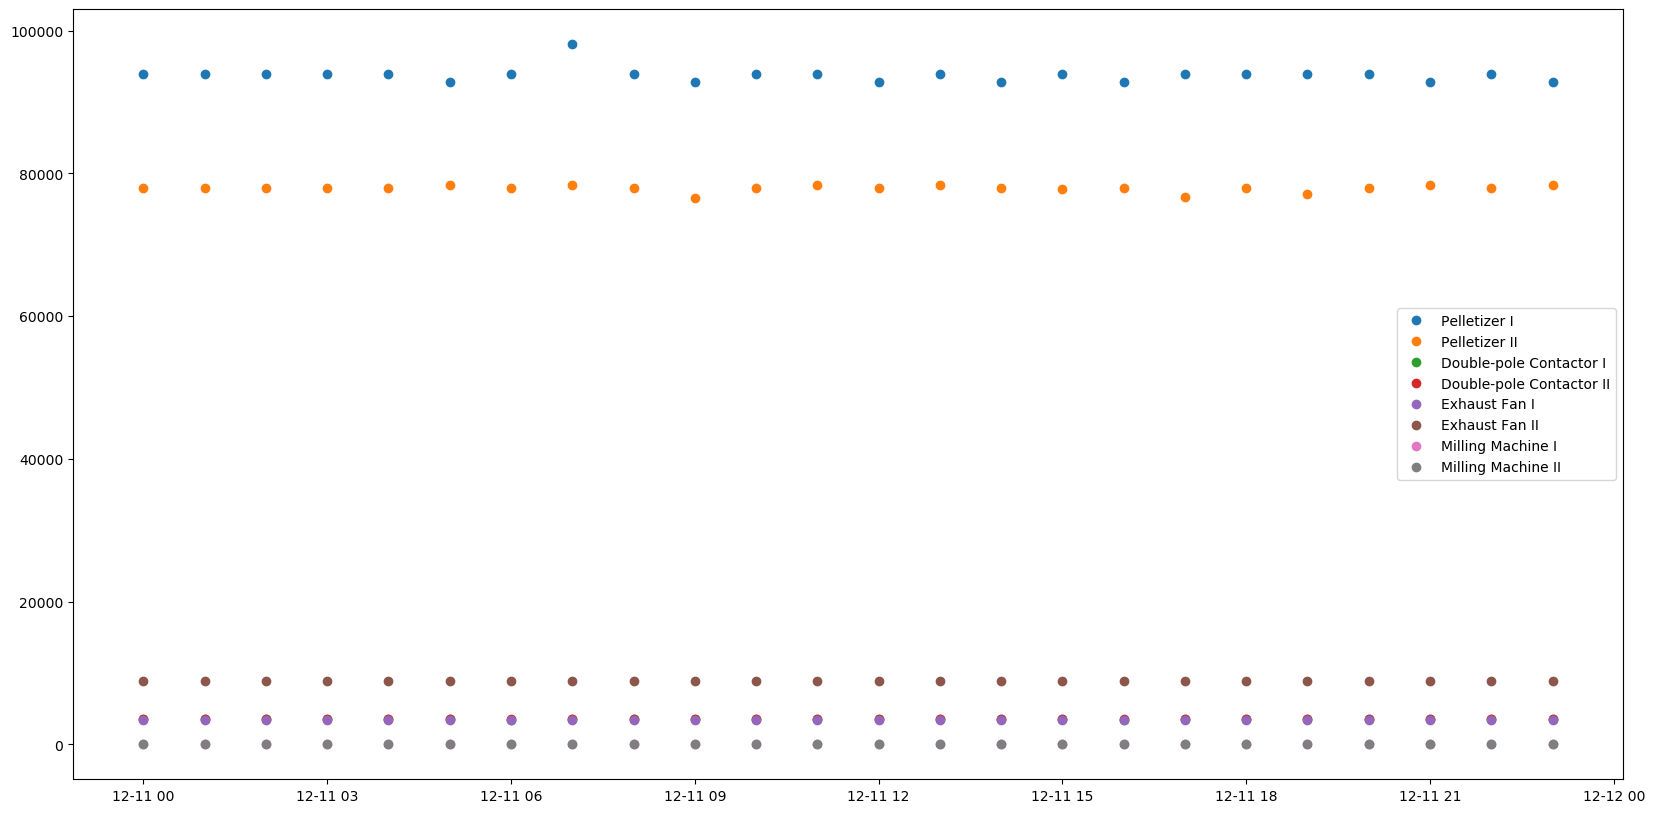

In [2]:
#pick a day (in this case the second day of the dataset)
day = start + pd.Timedelta(days=1)
#get the data for that day
hour_datas = datasetjson.get_data_day(day)
#daily data is a dictionary with the hour as key and the data as value
#each hour is a dictionary with the machine as key and the data as value
#each machine is a dictionary with 3 elements: 'power_apparent', 'voltage' and 'current'

#plot the data of all the machines for the entire day
plot_data(machine_names, hour_datas)



2017-12-11 00:00:00-02:00
('Pelletizer I', {'power_apparent': 93882.3, 'current': 434.244, 'voltage': 216.114})
('Pelletizer II', {'power_apparent': 77970.1, 'current': 361.636, 'voltage': 215.585})
('Double-pole Contactor I', {'power_apparent': 3517.64, 'current': 16.1508, 'voltage': 217.794})
('Double-pole Contactor II', {'power_apparent': 3502.27, 'current': 16.2495, 'voltage': 215.538})
('Exhaust Fan I', {'power_apparent': 3403.54, 'current': 15.6385, 'voltage': 217.28})
('Exhaust Fan II', {'power_apparent': 8929.86, 'current': 41.5964, 'voltage': 214.777})
('Milling Machine I', {'power_apparent': 0, 'current': 0, 'voltage': 0})
('Milling Machine II', {'power_apparent': 0, 'current': 0, 'voltage': 0})
---
2017-12-11 01:00:00-02:00
('Pelletizer I', {'power_apparent': 93882.3, 'current': 434.244, 'voltage': 216.114})
('Pelletizer II', {'power_apparent': 77970.1, 'current': 361.636, 'voltage': 215.585})
('Double-pole Contactor I', {'power_apparent': 3517.64, 'current': 16.1508, 'volta

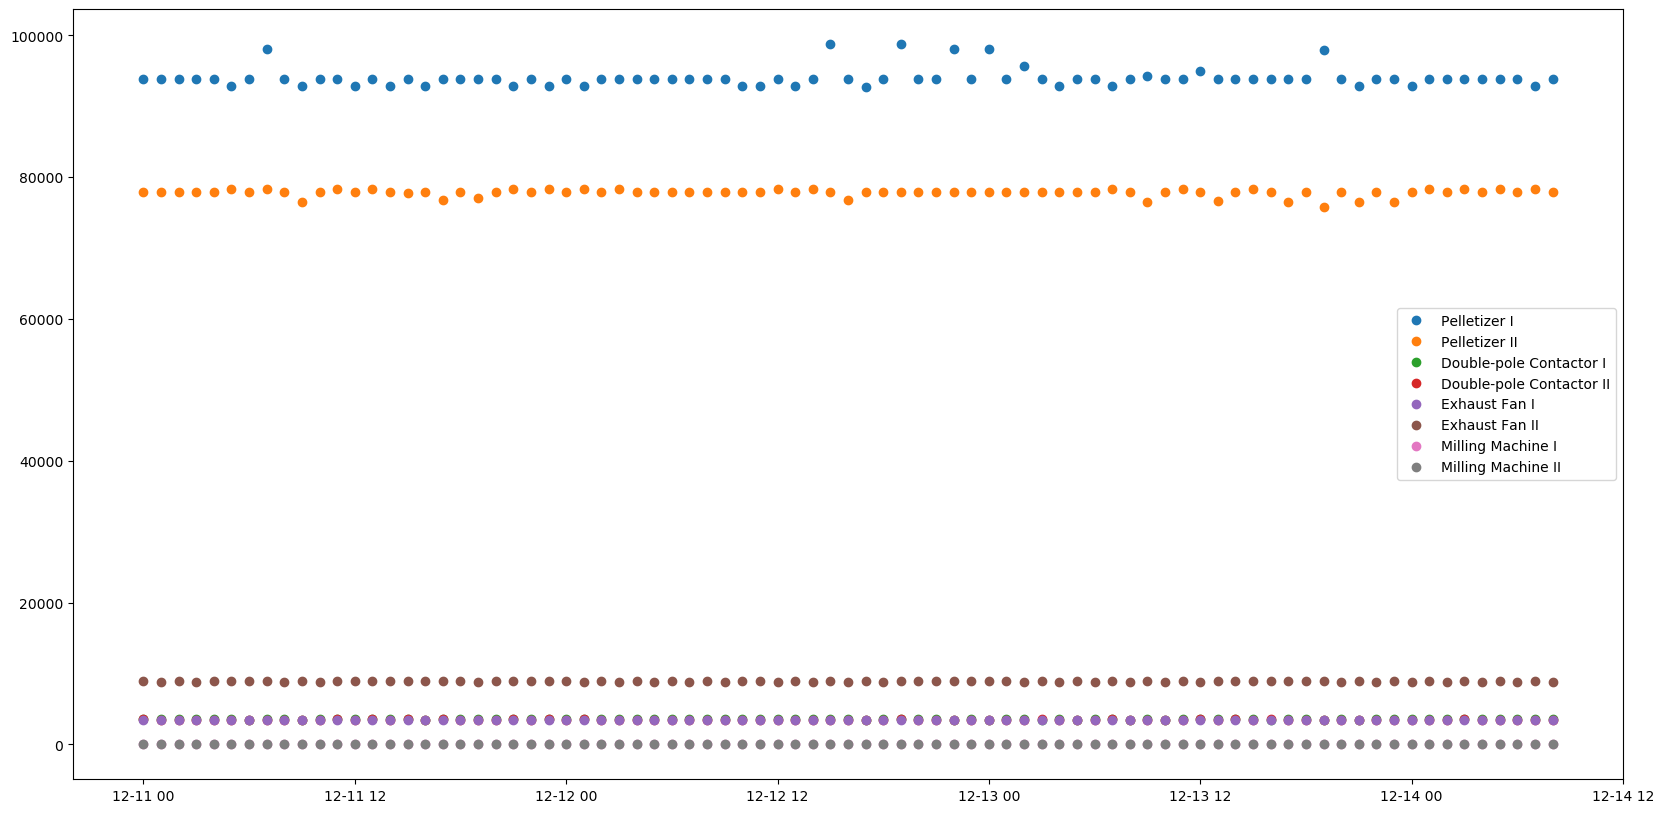

In [3]:
day = start + pd.Timedelta(days=5)
week_data = datasetjson.get_data_week(day)

plot_data(machine_names, week_data)

for hour_data in week_data.items():
    print(hour_data[0])
    for hour_data in hour_data[1].items():
        print(hour_data)
    print("---")

Month data for 12/2017, number of elements: 339
2017-12-10 21:00:00-02:00
('Pelletizer I', {'power_apparent': 93882.3, 'current': 434.244, 'voltage': 216.114})
('Pelletizer II', {'power_apparent': 77970.1, 'current': 361.636, 'voltage': 215.585})
('Double-pole Contactor I', {'power_apparent': 3506.05, 'current': 16.1085, 'voltage': 217.664})
('Double-pole Contactor II', {'power_apparent': 3502.27, 'current': 16.2495, 'voltage': 215.538})
('Exhaust Fan I', {'power_apparent': 3381.09, 'current': 15.5356, 'voltage': 217.302})
('Exhaust Fan II', {'power_apparent': 8856.7, 'current': 41.2889, 'voltage': 214.359})
('Milling Machine I', {'power_apparent': 0, 'current': 0, 'voltage': 0})
('Milling Machine II', {'power_apparent': 0, 'current': 0, 'voltage': 0})
---
2017-12-10 22:00:00-02:00
('Pelletizer I', {'power_apparent': 93882.3, 'current': 434.244, 'voltage': 216.114})
('Pelletizer II', {'power_apparent': 77970.1, 'current': 361.636, 'voltage': 215.585})
('Double-pole Contactor I', {'powe

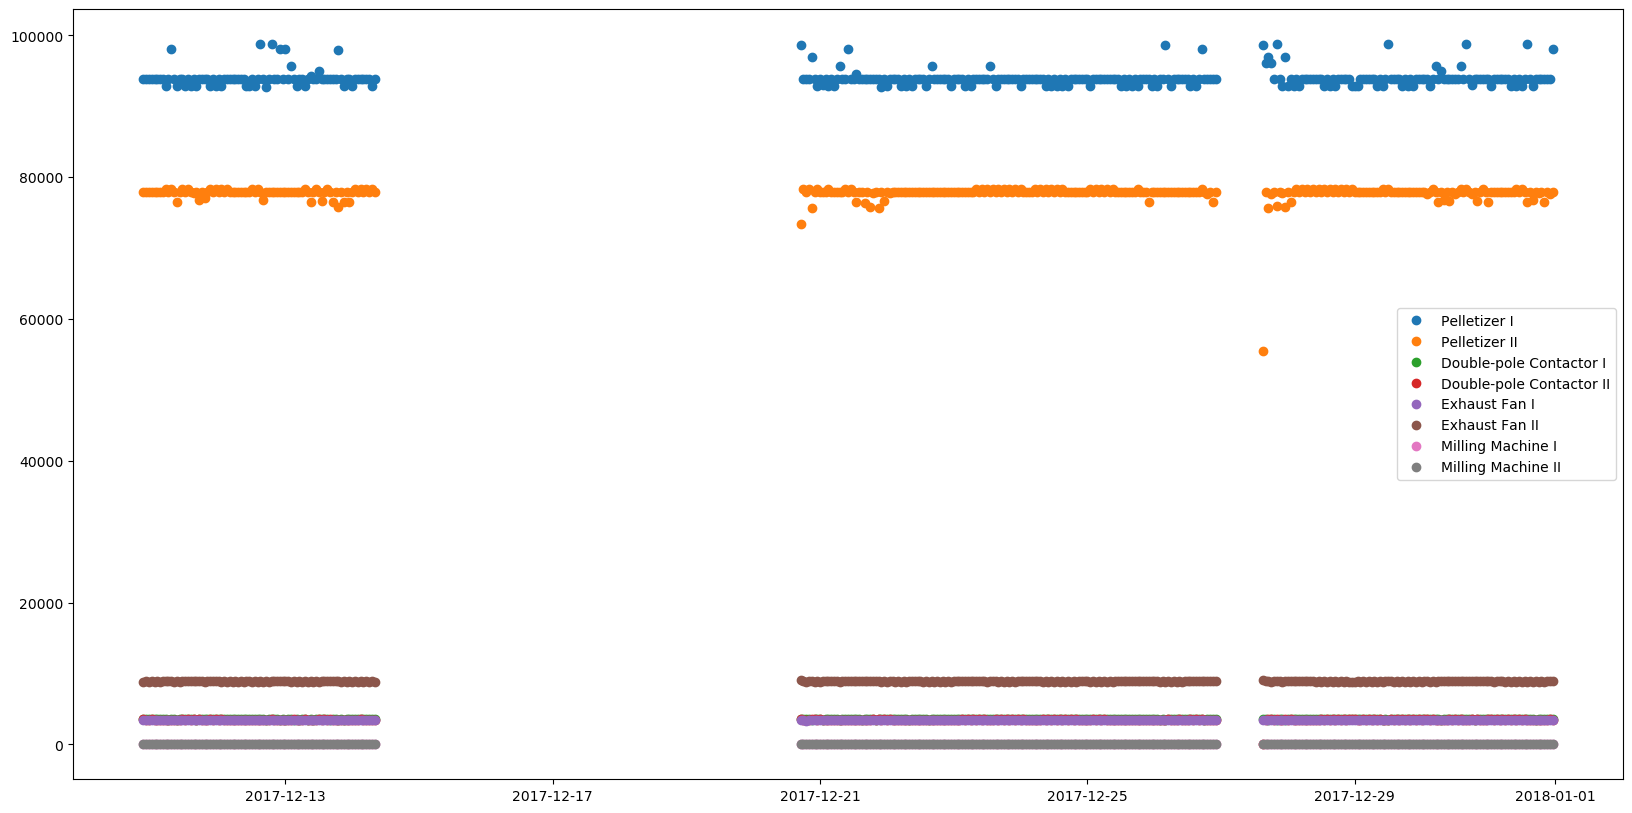

In [4]:
day = start + pd.Timedelta(days=1)
month_data = datasetjson.get_data_month(day)

plot_data(machine_names, month_data)

print(f"Month data for {day.month}/{day.year}, number of elements: {len(month_data)}")
for hour_data in month_data.items():
    print(hour_data[0])
    for hour_data in hour_data[1].items():
        print(hour_data)
    print("---")

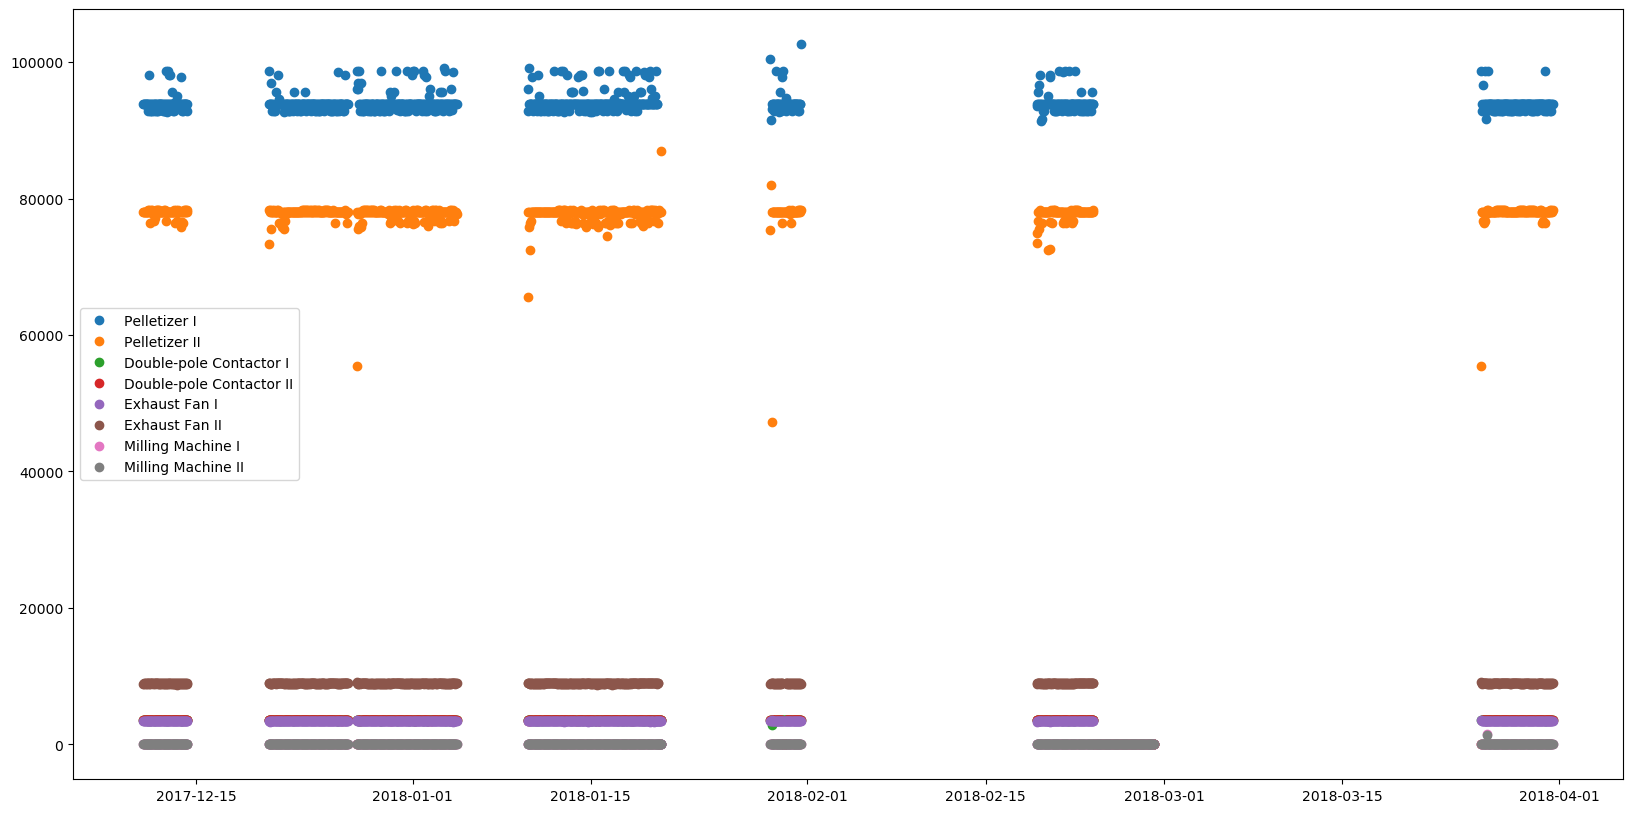

In [5]:
#this, or just use datasetjson.data
whole_data = datasetjson.get_data_start_end(start, end)

plot_data(machine_names, whole_data)